# El fenomeno de dispersion numerica

Ecuacion de diferencias finitas para la ecuacion the adveccion, metodo implicito.
$$
  w_{i j+1} =
  -\frac{\gamma}{4} (w_{i+1 j+1} - w_{i-1 j+1})
  -\frac{\gamma}{4} (w_{i+1 j} - w_{i-1 j})
 + w_{ij}
\tag{1} $$


## Dispersion:
Asuma un peloton de ciclistas en el plan. Todos van juntos. Empieza la loma y los mas pesados se quedan atras. Se forma una fila mas larga. Se "dispersan". De diccionario dispersar es "regarse".

En la fisica ocurre que la onda es una superposicion de muchas frecuencias. Cada frecuencia viaja a la misma velocidad no hay dispersion. Veremos ejemplos de esto.

En los metodos numericos existe un fenomeno llamado **dispersion numerica**. Tambien en la parte numerica hay frecuencias $\omega$ (numeros de onda $k$).

Mas formalmente definimos

1. **velocidad de fase**: Se define como

$$v_f = \frac{\omega}{k} = \frac{2 \pi f}{2 \pi \lambda} = \frac{1/T}{1/\lambda} = \frac{\lambda}{T} $$
donde
* $k=2 \pi/ \lambda$ es el numero de onda.
* $\lambda= v T$ es la longitud de onda.
* $T$ es periodo.

2. **Velocidad de grupo**
$$v_g = \frac{d \omega}{d k} $$

La ecuacion de onda es:

$$\frac{\partial^2 u}{\partial x^2} - \frac{1}{c^2} \frac{\partial^2 u}{\partial t^2} = 0 \tag{2} $$
Existe una relacion entre $\omega$ y $k$. Es decir
$\omega= \omega(k)$. Para descrubir esta relacion (que se llama relacion de dispersion) se puede tomar la **transformada de Fourier** (la clase de manana) de la ecuacon de onda.
Veremos que la transformada de fourier convirte la derivada
con respecto al tiempo en $-\mathrm{i} \omega$, y la derivada
en espacio en $\mathrm{i} k$. La segunda derivada es la primera aplicada dos veces y da como resultado, en la ecuacion de onda

$$\left ( -k^2 + \frac{\omega^2}{c^2} \right) U(k, \omega)=0  $$
Asumimos $U(k,\omega) \ne 0$, y econtramos, despejando

$$\omega = \pm c k $$
De aca sale que la velocidad de fase es

Asumimos velocidad $c$ constante
$$\frac{\omega}{k} = \pm c $$

La velocidad de grupo es
$$\frac{\partial \omega}{\partial k} = \pm c $$

La velocidad de grupo y de fase son iguales.

Otra forma de obtner la relacion de dispersion sin recurrir a la transformada de Fourier es asumiendo una solucion (onda plana) obtenida de la separacion de variables.

$$u(x,t; \omega, k) = A \mathrm{e}^{-\mathrm{i}( kx - \omega t) } $$

Asumimos la amplitud $A \ne 0$. Dejamos de tarea probar que al intertar esta ecuacion en la ecuacion de onda (1) se obtiene la relacion de dispersion para la onda con velocidad constante en 1D $\omega = \pm c k$.

## Diccionario de fenomenos de onda
* Reflexion: La rebota, por ejemplo en los bordes. Recuerde las animaciones de la ultima tarea.
* Transmision: La onda se transmite de un medio al otro. En las animaciones de la ultima tarea, cuando cambia de velocidad.
* Refraccion, es transmision pero con cambio de direccion. El ultima tarea no se observa por que es 1D. El fenomeno, por ejemplo se ve en una piscina con una vara larga insertada al agua. Ley de Snell, principio de Fermat.
* Difraccion. La onda toca una punta y se difracta en todas las direcciones. O la onda llega aun punto estrecho se difracta.




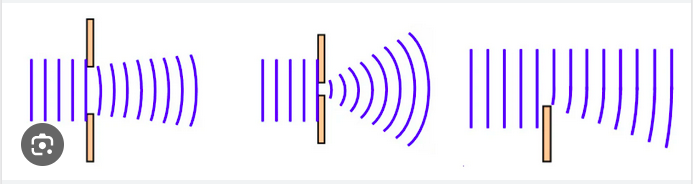

* Dispersion. La onda se riega. Ejemplo en la figura de abajo.
donde tambien se observa la refraccion.

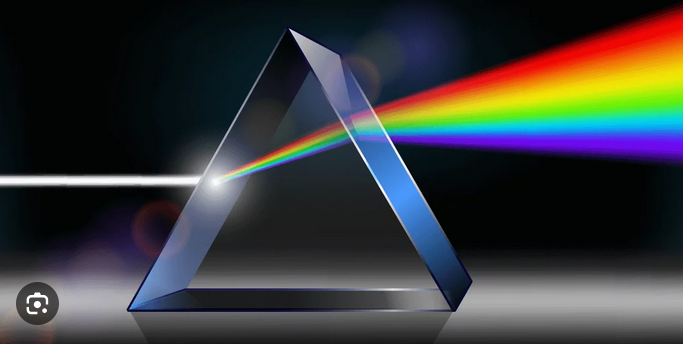

Eso fisica. Volvamos a lo numerico. Los esquemas numericos pueden sufir tambien de dispersion (numerica). Veamos




De la ecuacion de adveccion tenemos

$$w_{i j+1} = \gamma^2 w_{i-1 j} + 2(1 - \gamma^2) w_{ij} + \gamma^2 w_{i+1 j} - w_{i j-1} (3)$$

Para encontrar la relacion de dispersion en esta ecuacion tomamos la transformada de Fourier a la ecuacion (3) y usamos el hecho (lo veremos manana) de que si hay un "shift" en tiempo o en espacio este genera un factor del tipo. Si $u(x, t + \Delta t)$ produce
$$\mathrm{e}^{-\mathrm{i} \omega \Delta t} U(k, \omega) $$
Si es en epacio, es decir $u(x + \Delta x, t)$
$$\mathrm{e}^{\mathrm{i} k \Delta x} U(k, \omega) $$
Obtnemos,

$$W_{ij} ( \mathrm{e}^{\mathrm{i} \omega \Delta t} + \mathrm{e}^{-\mathrm{i} \omega \Delta t}) = ( \gamma^2 \mathrm{e}^{-\mathrm{i} k \Delta x} + 2(1 - \gamma^2) + \gamma^2 \mathrm{e}^{\mathrm{i} k \Delta x} ) W_{ij}$$
Tenemos entonces el resultado

$$ [2 \cos \omega \Delta t - 2 \gamma^2 \cos k \Delta x - 2(1 - \gamma^2) ] W_{ij} = 0 $$

REcuerde que la relacion de disperion es la relacion entre $\omega$ y $k$ y toca despejar $\omega$.

$$\omega \Delta t = \arccos ( \gamma^2( \cos k \Delta x + (1 - \gamma^2) \tag{4} $$
De aca, la velocidad de fase esta dada por

$$v_f = \frac{\omega}{k} = \frac{1}{k \Delta t} \arccos ( \gamma^2 \cos( k \Delta x) + (1 - \gamma^2)) $$

Claramente la velocidad de fase depende de $k$. No es constante
Cada frecuencia $k, \omega$ tiene velocidades de fase distintas.
Ahora veamos lo que ocurre con la velocidad de grupo.


$$\frac{\partial \omega}{\partial k} = \frac{\Delta x}{\Delta t} \frac{-\gamma^2 \sin(k \Delta x)}{\sqrt{1 -[ \gamma^2 \cos k \Delta x + (1 - \gamma^2)]^2}} $$
Tambien la velocidad de grupo depende de las frecuencias. O sea que la implementacion numerica es dispersiva.




Hay un caso intersante. Que pasa si $\gamma=1$, de la ecuacion (1)
$$ \omega \Delta t = k \Delta x$$
o sea que la velocidad de fase es igual a la velocidad de grupo y a $\Delta x/\Delta t$ que es la velocidad inducida por la malla.

$$v_f = v_g = \frac{\omega}{k}= \frac{\Delta x}{\Delta t}= c $$




**Ejemplo 1**: Vimos la propagacion en un pulso gaussiano y no observamos nada raro, execpto en tempos lejanos.
Lo que pasa es que las guassianas son muy saves y tienen un margen limitado de frecuencias. Si escogemos otra fuente, por ejemplo

\begin{eqnarray}
f(x) = \left \{
    \begin{array}{cc}
    1 &  x = 1/2 \\
    0 & x \ne 1/2
    \end{array}
    \right .
\end{eqnarray}

No voy a volver a programar el metodo de adveccion.



In [ ]:
from waveeq2 import solve_waveeq

In [ ]:
from waveeq2 import solve_waveeq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16,10))

# prueba numerica
def v(x):
    return 1

# condiciones de borde e iniciales en 0
def e(x):
    return 0

def f(x):
    return 0

def p(x):
    # impulse
    if x == 0.5: return 1
    else: return 0

def q(x):
    return 0

def g(x,t):
    return 0

dt = 0.001
nt = 1001
nx = 501
a = 0
b = 1
t0 = 0

w=solve_waveeq(v,a,b,t0,nt,nx,dt,e,f,p,q,g)




dimensiones de w (501, 1001)


<Figure size 1600x1000 with 0 Axes>

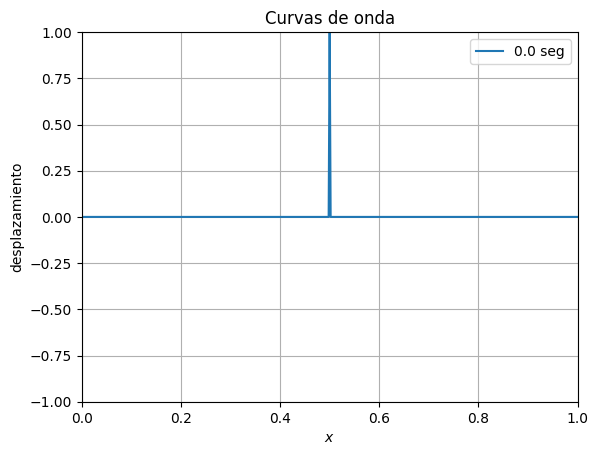

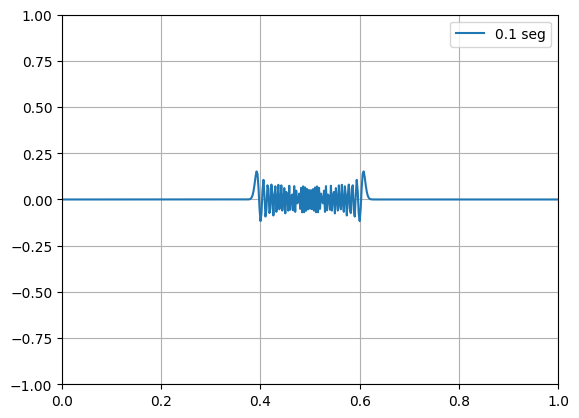

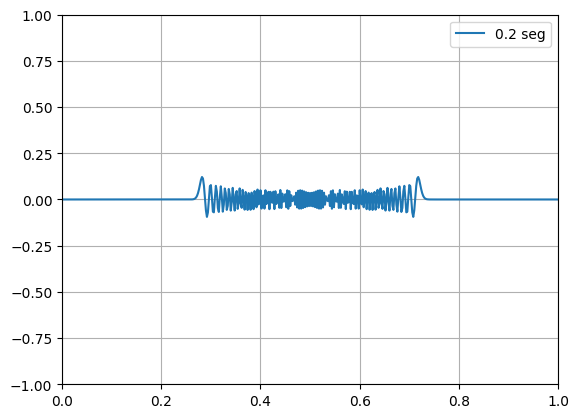

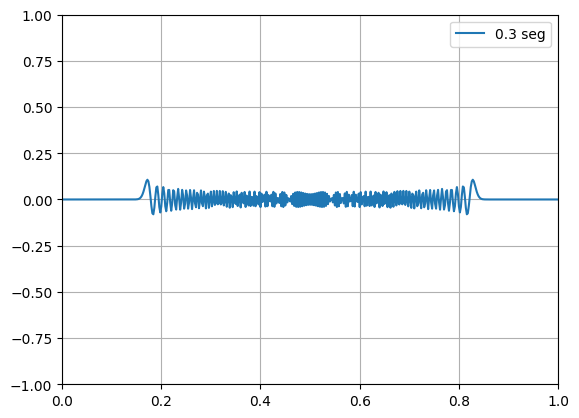

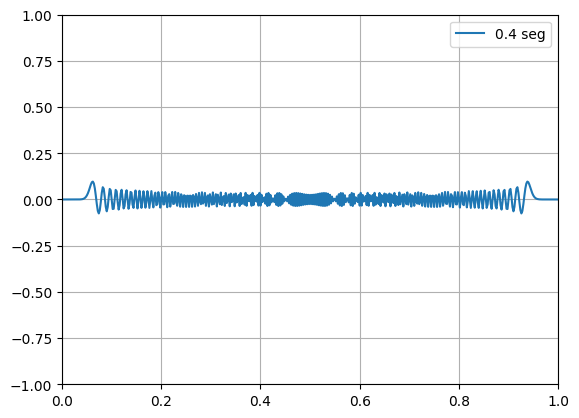

In [ ]:
# graficamos
params={'legend.fontsize':5, 'legend.handlength':1}

Ndt=111
plt.xlabel(r'$x$')
plt.ylabel(r'desplazamiento')
plt.title(r'Curvas de onda')

Nt=int(nt/2)

X = np.linspace(a,b,w.shape[0])
for j in range(0,Nt,Ndt):
    t = j*dt
    plt.plot(X,w[:,j], label=str(round(t,1)) + ' seg')
    plt.axis([0,1.0,-1,1])

    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
nx=1001
w=solve_waveeq(v,a,b,t0,nt,nx,dt,e,f,p,q,g)

error: la condición de estabilidad fue violada
    dt= 0.00
    debe ser menor que dx/c=0.00100000
    gamma debe ser menor que 1 pero tenemos que gamma=1.000000000
dimensiones de w (1001, 1001)


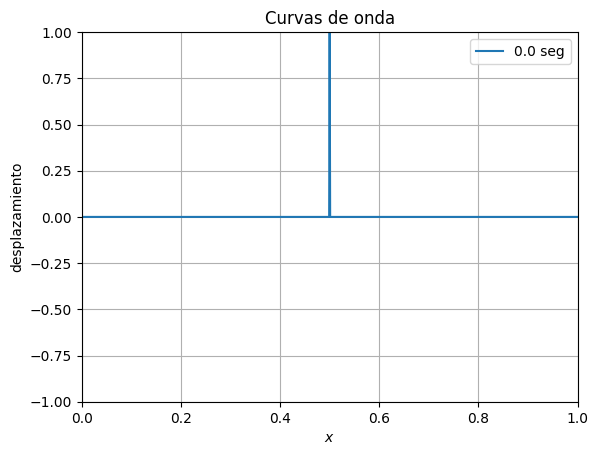

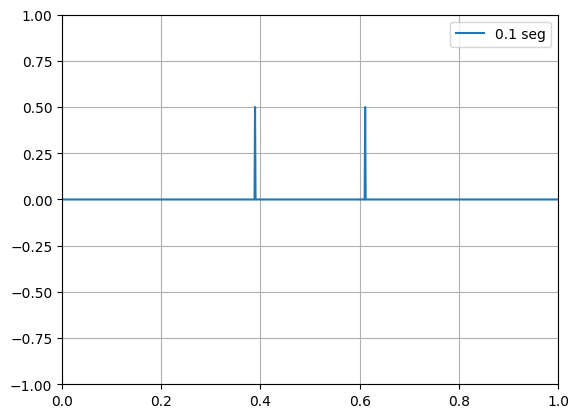

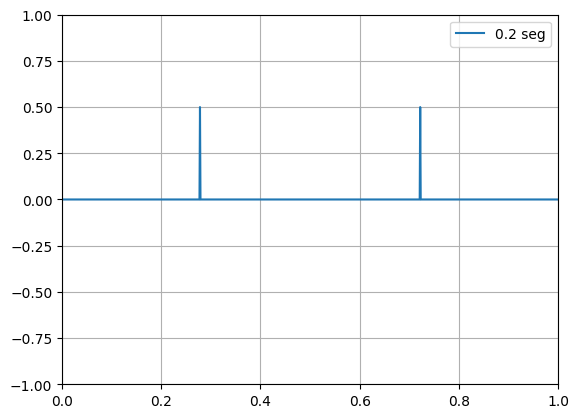

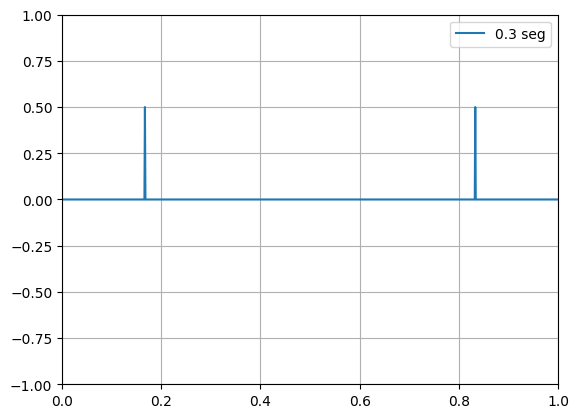

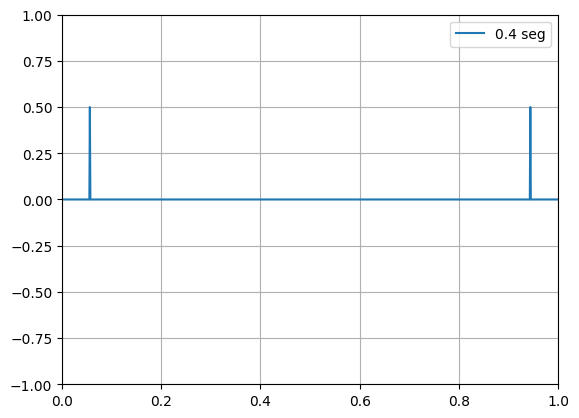

In [ ]:
# graficamos
params={'legend.fontsize':5, 'legend.handlength':1}

Ndt=111
plt.xlabel(r'$x$')
plt.ylabel(r'desplazamiento')
plt.title(r'Curvas de onda')

Nt=int(nt/2)

X = np.linspace(a,b,w.shape[0])
for j in range(0,Nt,Ndt):
    t = j*dt
    plt.plot(X,w[:,j], label=str(round(t,1)) + ' seg')
    plt.axis([0,1.0,-1,1])

    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
def p(x):
    return np.exp(-400.*(x-0.5)**2)

In [ ]:
w=solve_waveeq(v,a,b,t0,nt,nx,dt,e,f,p,q,g)

error: la condición de estabilidad fue violada
    dt= 0.00
    debe ser menor que dx/c=0.00100000
    gamma debe ser menor que 1 pero tenemos que gamma=1.000000000
dimensiones de w (1001, 1001)


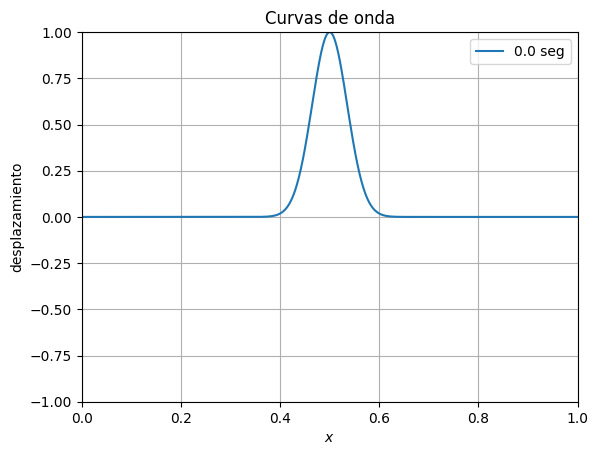

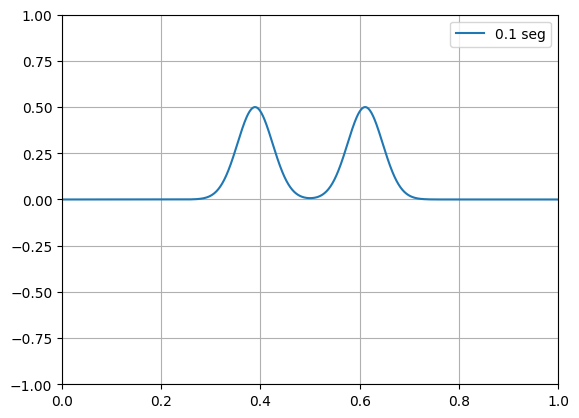

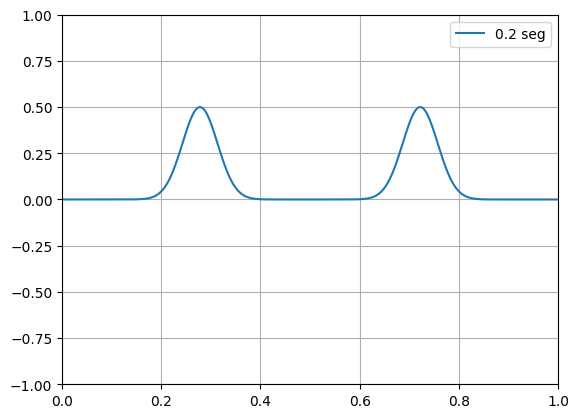

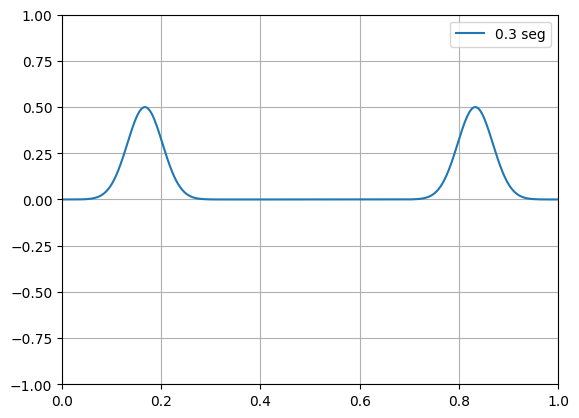

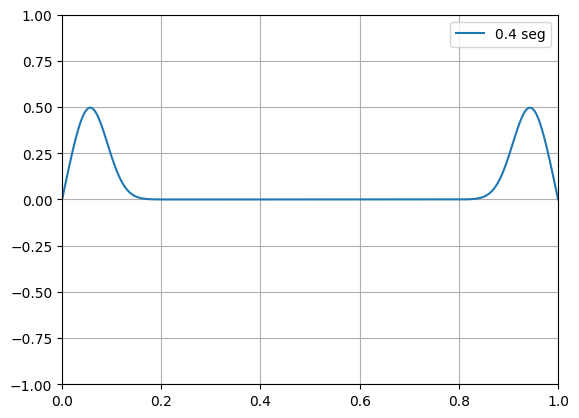

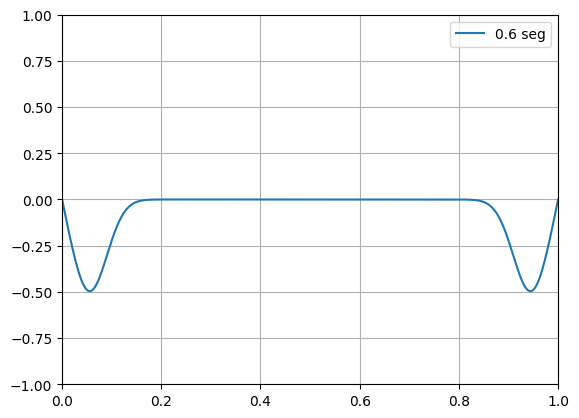

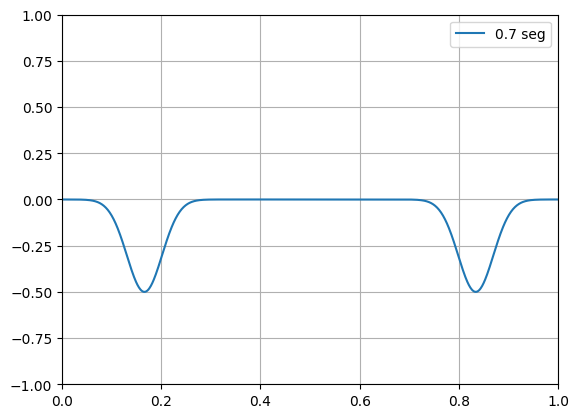

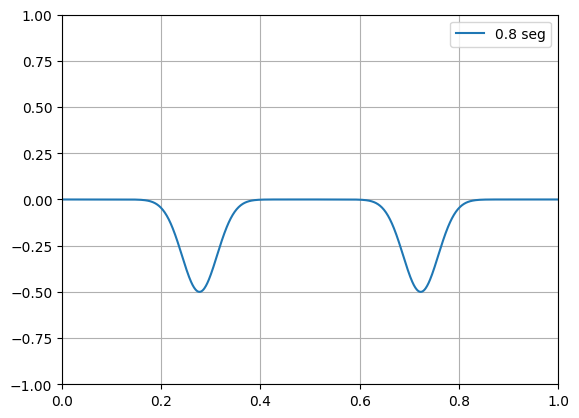

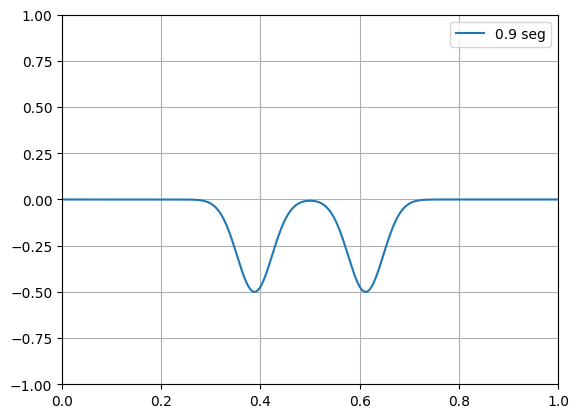

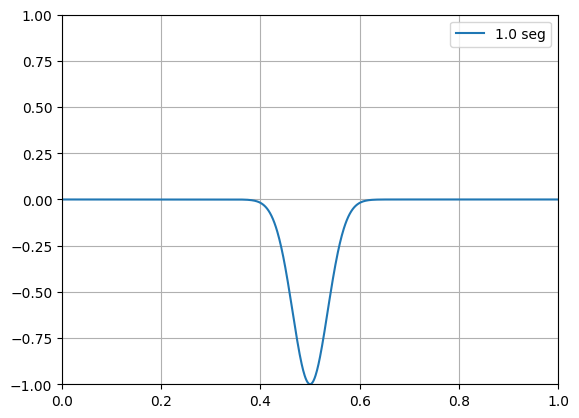

In [ ]:
# graficamos
params={'legend.fontsize':5, 'legend.handlength':1}

Ndt=111
plt.xlabel(r'$x$')
plt.ylabel(r'desplazamiento')
plt.title(r'Curvas de onda')

Nt=2*int(nt/2)

X = np.linspace(a,b,w.shape[0])
for j in range(0,Nt,Ndt):
    t = j*dt
    plt.plot(X,w[:,j], label=str(round(t,1)) + ' seg')
    plt.axis([0,1.0,-1,1])

    plt.grid(True)
    plt.legend()
    plt.show()

# Prueba de estabilidad
Note que en los ejemplos de arriba $\gamma=1$ que esta
en el limite de estabilidad. Si escogemos $\gamma>1$
el sistema es intestable. Veamos un ejemplo.

In [ ]:
def p(x):
    return 6*np.sin(np.pi*x)

dt = 0.01
nt=101
w=solve_waveeq(v,a,b,t0,nt,nx,dt,e,f,p,q,g)



error: la condición de estabilidad fue violada
    dt= 0.01
    debe ser menor que dx/c=0.00100000
    gamma debe ser menor que 1 pero tenemos que gamma=10.000000000
dimensiones de w (1001, 101)


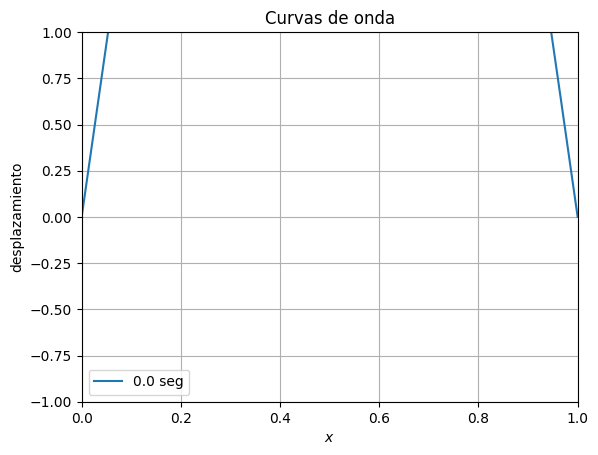

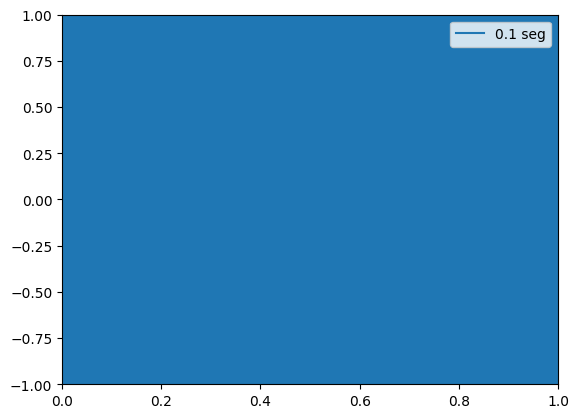

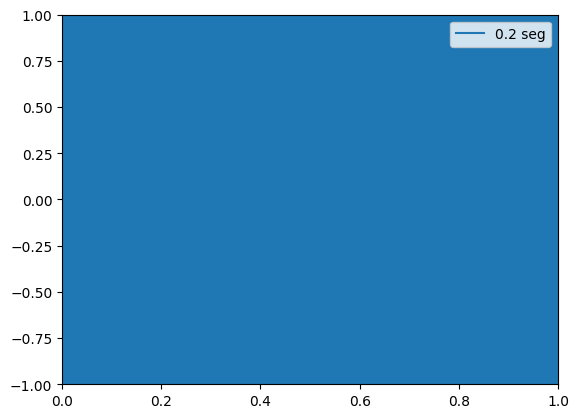

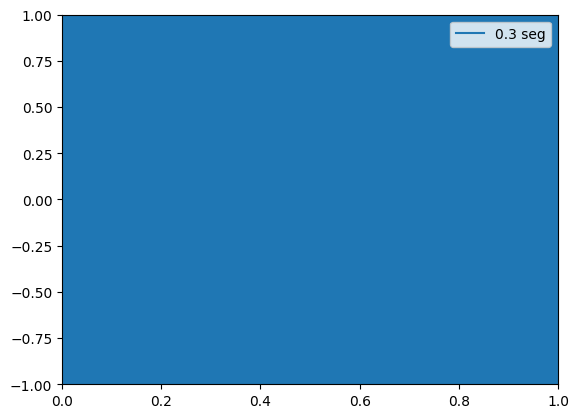

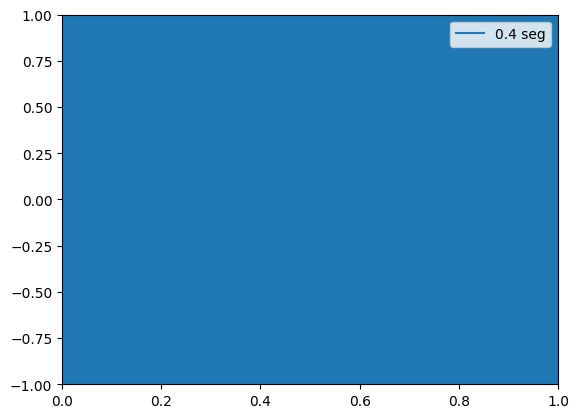

In [ ]:
# graficamos
params={'legend.fontsize':5, 'legend.handlength':1}

Ndt=11
plt.xlabel(r'$x$')
plt.ylabel(r'desplazamiento')
plt.title(r'Curvas de onda')

Nt=int(nt/2)

X = np.linspace(a,b,w.shape[0])
for j in range(0,Nt,Ndt):
    t = j*dt
    plt.plot(X,w[:,j], label=str(round(t,1)) + ' seg')
    plt.axis([0,1.0,-1,1])

    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
w

array([[ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 1.88495249e-002,  1.88402231e-002,  1.88123267e-002, ...,
        -1.08927962e+235,  4.44519802e+237, -1.81410353e+240],
       [ 3.76988638e-002,  3.76802602e-002,  3.76244676e-002, ...,
         2.28845106e+235, -9.33965220e+237,  3.81126141e+240],
       ...,
       [ 3.76988638e-002,  3.76802602e-002,  3.76244677e-002, ...,
         8.17392692e+237, -3.15158102e+240,  1.21510421e+243],
       [ 1.88495249e-002,  1.88402231e-002,  1.88123266e-002, ...,
        -4.35734587e+237,  1.68013587e+240, -6.47820647e+242],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000]])

## Analisis de dispersion en la ecuacion de adveccion.
Recuerde la ecuacion de adveccion

$$u_x + \frac{1}{c} u_t = 0 $$

Si tomamos la transforma de Fourier encontramos

$$\left ( \mathrm{i} k - \frac{\mathrm{i} \omega}{c} \right) U(k,\omega) = 0 $$

De aca que
$$ \omega = k c$$ y
el sistema numerico **no es dispersivo**.
pues
$$v_f = v_g = \frac{\omega}{k}= c $$

El Crank-Nicholson esta dado por la ecuacion (1).

$$
  w_{i j+1} =
  -\frac{\gamma}{4} (w_{i+1 j+1} - w_{i-1 j+1})
  -\frac{\gamma}{4} (w_{i+1 j} - w_{i-1 j})
 + w_{ij}
\tag{1} $$

Si tomamos la transformada de Fourier

$$W_{ij} \mathrm{e}^{-\mathrm{i} \omega \Delta t} = \frac{\gamma}{4} ( \mathrm{e}^{\mathrm{i} k \Delta x}  \mathrm{e}^{-\mathrm{i} \omega \Delta t} -  \mathrm{e}^{-\mathrm{i} k \Delta x}  \mathrm{e}^{-\mathrm{i} \omega \Delta t} ) W_{ij} -
\frac{\gamma}{4} ( \mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i} k \Delta x}) W_{ij}) + W_{ij} $$

Se deja como tarea al estudiante encontrar la relacion de dispersion $\omega = \omega(k)$ y indicar si hay o no dispersion numerica.




# Ecuaciones elipticas

La ecuacion eliptica canonica se llama de **Poisson**

$$\nabla^2 u(x,y) \equiv \frac{\partial^2 u}{\partial x^2 }(x,y) + \frac{\partial^2 u}{\partial y^2}(x,y) = \rho(x,y) $$  

## Formulacion en diferencias finitas
En el intervalo $[a,b] \times [c,d]$
$x_i = x_0 + i \Delta x, y_j=y_0 + j \Delta y$, $x_0=a$, y_0=c, $\Delta x = (b-a)/nx $, $\Delta y = (d-c)/nx$,
$w_{ij}=u(x_i, y_j)$, $\rho_{ij}= \rho(x_i, y_j)$

Usando diferencias finitas centrales tanto en $x$ como en $y$

$$\frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}
+ \frac{w_{i j+1} - 2 w_{ij} + w_{i j-1}}{\Delta y^2} = \rho_{ij} $$

Las condiciones de bordo son

\begin{eqnarray}
w_{0j} = e_j \quad , \quad j = 0, 1, \cdots, ny \\
w_{nx j} = f_j \quad , \quad j = 0, 1, \cdots, ny \\
w_{i0} = g_i \quad , \quad i = 0, 1, \cdots, nx \\
w_{i ny} = y_i \quad , \quad i = 0, 1, \cdots, nx \\
\tag{6}
\end{eqnarray}

Por supuesto en las esqunas hay doble definicion. Entonces
para evitar inconsitencias

$$e_0 = g_0 , f_{ny} = h_{nx}, g_{nx}=f_0, e_{ny}=h_0 $$

Simplifiquemos (6)

$$w_{i+1 j} - 2 w_{ij} \left ( 1 + \frac{(\Delta x)^2}{(\Delta y)^2} \right ) - w_{i-1 j} + \frac{(\Delta x)^2}{(\Delta y)^2}
(w_{i j+1} + w_{i j-1}) = \Delta x^2 \rho_{ij}$$

Simplifiquemos esta ecuacion un poco mas


$$w_{i+1 j} - 2 w_{ij} (1  + \beta^2) + w_{i-1 j} + \beta^2( w_{i j+1} + w_{i j-1}) = (\Delta x)^2 \rho_{ij} $$
donde $\beta = \Delta x /\Delta y$. Si $\Delta x = \Delta y$ entonces $\beta=1$ y podemos escribir

$$w_{i+1 j} - 4 w_{ij}  + w_{i-1 j} + ( w_{i j+1} + w_{i j-1}) = (\Delta x)^2 \rho_{ij} $$

La molecula se muestra en la figura siguiente

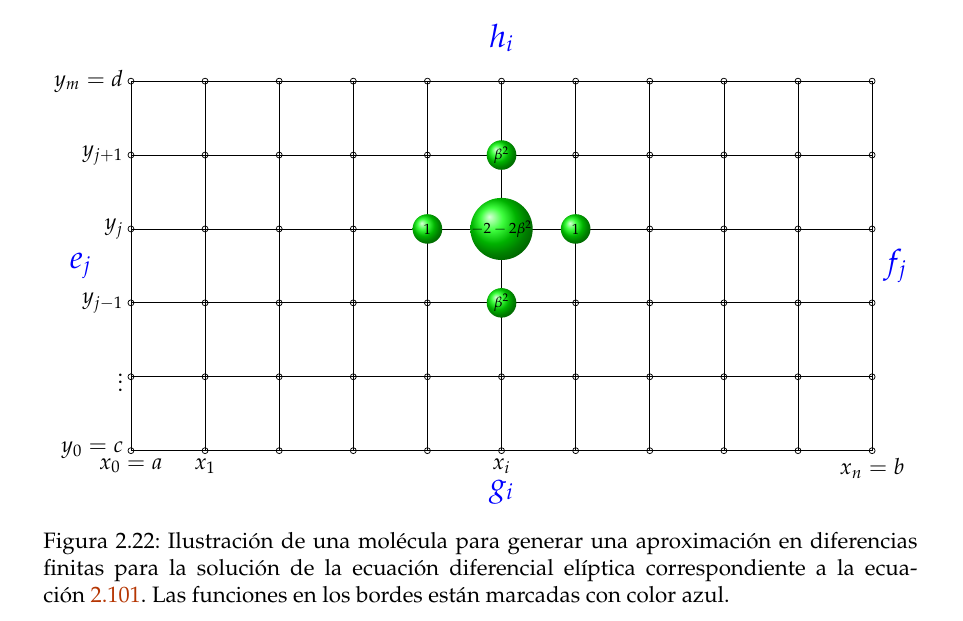